In [1]:
source_folder="../data-amaltea/binary/"

#ini_date = '04/01/23 12:00:00'
#end_date = '06/01/23 13:00:00'
#target_folder="./time-data/evaluation/"

#[9:50, 11/10/2023] Aurora: setup: 20/12/2022 a las 15:00 a. m. hasta el 23/12/2022 a las 15:00 a. m.
#[9:50, 11/10/2023] Aurora: config: 04/01/2023 a las 12:00 a. m. hasta el 06/01/2023 a las 12:00 a. m.

ini_date = '20/12/22 15:00:00'
end_date = '23/12/22 15:00:00'
target_folder="./time-data/setup/"


time_step=15


#binary_sensors=["cubiertos"]

binary_sensors=["cubiertos", "estropajo","vasos","fregadero","fridge","lavadora","microwave","ollas","trash"]


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime

def day_time(ti):
    return int((int)(ti/(60*60*24)))



t0 = (int)(datetime.strptime(ini_date, '%d/%m/%y %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0))

tN = (int)(datetime.strptime(end_date, '%d/%m/%y %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN))

def relT(ti):
    return (int)((ti-t0)/time_step)


20/12/22 15:00:00 Init date is 1671544800 day: 19346
23/12/22 15:00:00 End date is 1671804000 day: 19349


In [3]:
import pandas as pd

df = pd.DataFrame()

ts=[]
for t in range(t0,tN,time_step):
    ts.append(datetime.fromtimestamp( t))

df['Time']=ts    
    

In [4]:

for sensor in binary_sensors:
    lastV=-1
    dt=[]
    cS=0
    for d in range(day_time(t0),day_time(tN)+1):
        print("Loading day ",d)
        try:
            series=read_csv(source_folder+str(d)+"."+sensor+".tsv", sep="\t",parse_dates=True,header=None)
            for vt in series.values[:,[0,2]]:
                cS=cS+1
                if(lastV != vt[1]):
                    dt.append([relT(vt[0]),1])
                else:
                    #print("ignoring ",vt[0])
                    dt.append([relT(vt[0]),1])
                lastV=vt[1]
        except:
            print(" Not data for sensor ",sensor, " in day ",d)
    
    print("#Sensor:",sensor, " #:",cS)
    dt=np.array(dt)
    #print(dt.shape)
    #print(dt)
    ts=dt[:,0]
    f = open(target_folder+sensor+".tsv", "w")
    vs=[]
    cS=0
    for t in range(t0,tN,time_step):
        ti=relT(t)
        print("ti:",ti)
        i=np.where( (ts==ti))[0]
        if(len(i)!=0):
            cS=cS+1
            vs.append(1)
            f.write(str(ti)+"\t1\t"+datetime.fromtimestamp( t).strftime("%Y-%m-%d %H:%M:%S")+"\n")
        else:
            vs.append(0)
            f.write(str(ti)+"\t0\t"+datetime.fromtimestamp( t).strftime("%Y-%m-%d %H:%M:%S")+"\n")
    f.close()
    df[sensor]=vs
    print("#Sensor:",sensor, " #:",cS)


        

Loading day  19346
Loading day  19347
Loading day  19348
Loading day  19349
#Sensor: cubiertos  #: 249
ti: 0
ti: 1
ti: 2
ti: 3
ti: 4
ti: 5
ti: 6
ti: 7
ti: 8
ti: 9
ti: 10
ti: 11
ti: 12
ti: 13
ti: 14
ti: 15
ti: 16
ti: 17
ti: 18
ti: 19
ti: 20
ti: 21
ti: 22
ti: 23
ti: 24
ti: 25
ti: 26
ti: 27
ti: 28
ti: 29
ti: 30
ti: 31
ti: 32
ti: 33
ti: 34
ti: 35
ti: 36
ti: 37
ti: 38
ti: 39
ti: 40
ti: 41
ti: 42
ti: 43
ti: 44
ti: 45
ti: 46
ti: 47
ti: 48
ti: 49
ti: 50
ti: 51
ti: 52
ti: 53
ti: 54
ti: 55
ti: 56
ti: 57
ti: 58
ti: 59
ti: 60
ti: 61
ti: 62
ti: 63
ti: 64
ti: 65
ti: 66
ti: 67
ti: 68
ti: 69
ti: 70
ti: 71
ti: 72
ti: 73
ti: 74
ti: 75
ti: 76
ti: 77
ti: 78
ti: 79
ti: 80
ti: 81
ti: 82
ti: 83
ti: 84
ti: 85
ti: 86
ti: 87
ti: 88
ti: 89
ti: 90
ti: 91
ti: 92
ti: 93
ti: 94
ti: 95
ti: 96
ti: 97
ti: 98
ti: 99
ti: 100
ti: 101
ti: 102
ti: 103
ti: 104
ti: 105
ti: 106
ti: 107
ti: 108
ti: 109
ti: 110
ti: 111
ti: 112
ti: 113
ti: 114
ti: 115
ti: 116
ti: 117
ti: 118
ti: 119
ti: 120
ti: 121
ti: 122
ti: 123
ti: 124
ti: 125

ti: 11662
ti: 11663
ti: 11664
ti: 11665
ti: 11666
ti: 11667
ti: 11668
ti: 11669
ti: 11670
ti: 11671
ti: 11672
ti: 11673
ti: 11674
ti: 11675
ti: 11676
ti: 11677
ti: 11678
ti: 11679
ti: 11680
ti: 11681
ti: 11682
ti: 11683
ti: 11684
ti: 11685
ti: 11686
ti: 11687
ti: 11688
ti: 11689
ti: 11690
ti: 11691
ti: 11692
ti: 11693
ti: 11694
ti: 11695
ti: 11696
ti: 11697
ti: 11698
ti: 11699
ti: 11700
ti: 11701
ti: 11702
ti: 11703
ti: 11704
ti: 11705
ti: 11706
ti: 11707
ti: 11708
ti: 11709
ti: 11710
ti: 11711
ti: 11712
ti: 11713
ti: 11714
ti: 11715
ti: 11716
ti: 11717
ti: 11718
ti: 11719
ti: 11720
ti: 11721
ti: 11722
ti: 11723
ti: 11724
ti: 11725
ti: 11726
ti: 11727
ti: 11728
ti: 11729
ti: 11730
ti: 11731
ti: 11732
ti: 11733
ti: 11734
ti: 11735
ti: 11736
ti: 11737
ti: 11738
ti: 11739
ti: 11740
ti: 11741
ti: 11742
ti: 11743
ti: 11744
ti: 11745
ti: 11746
ti: 11747
ti: 11748
ti: 11749
ti: 11750
ti: 11751
ti: 11752
ti: 11753
ti: 11754
ti: 11755
ti: 11756
ti: 11757
ti: 11758
ti: 11759
ti: 11760
ti: 11761


Loading day  19347
Loading day  19348
Loading day  19349
#Sensor: estropajo  #: 39
ti: 0
ti: 1
ti: 2
ti: 3
ti: 4
ti: 5
ti: 6
ti: 7
ti: 8
ti: 9
ti: 10
ti: 11
ti: 12
ti: 13
ti: 14
ti: 15
ti: 16
ti: 17
ti: 18
ti: 19
ti: 20
ti: 21
ti: 22
ti: 23
ti: 24
ti: 25
ti: 26
ti: 27
ti: 28
ti: 29
ti: 30
ti: 31
ti: 32
ti: 33
ti: 34
ti: 35
ti: 36
ti: 37
ti: 38
ti: 39
ti: 40
ti: 41
ti: 42
ti: 43
ti: 44
ti: 45
ti: 46
ti: 47
ti: 48
ti: 49
ti: 50
ti: 51
ti: 52
ti: 53
ti: 54
ti: 55
ti: 56
ti: 57
ti: 58
ti: 59
ti: 60
ti: 61
ti: 62
ti: 63
ti: 64
ti: 65
ti: 66
ti: 67
ti: 68
ti: 69
ti: 70
ti: 71
ti: 72
ti: 73
ti: 74
ti: 75
ti: 76
ti: 77
ti: 78
ti: 79
ti: 80
ti: 81
ti: 82
ti: 83
ti: 84
ti: 85
ti: 86
ti: 87
ti: 88
ti: 89
ti: 90
ti: 91
ti: 92
ti: 93
ti: 94
ti: 95
ti: 96
ti: 97
ti: 98
ti: 99
ti: 100
ti: 101
ti: 102
ti: 103
ti: 104
ti: 105
ti: 106
ti: 107
ti: 108
ti: 109
ti: 110
ti: 111
ti: 112
ti: 113
ti: 114
ti: 115
ti: 116
ti: 117
ti: 118
ti: 119
ti: 120
ti: 121
ti: 122
ti: 123
ti: 124
ti: 125
ti: 126
ti: 127
ti:

ti: 11098
ti: 11099
ti: 11100
ti: 11101
ti: 11102
ti: 11103
ti: 11104
ti: 11105
ti: 11106
ti: 11107
ti: 11108
ti: 11109
ti: 11110
ti: 11111
ti: 11112
ti: 11113
ti: 11114
ti: 11115
ti: 11116
ti: 11117
ti: 11118
ti: 11119
ti: 11120
ti: 11121
ti: 11122
ti: 11123
ti: 11124
ti: 11125
ti: 11126
ti: 11127
ti: 11128
ti: 11129
ti: 11130
ti: 11131
ti: 11132
ti: 11133
ti: 11134
ti: 11135
ti: 11136
ti: 11137
ti: 11138
ti: 11139
ti: 11140
ti: 11141
ti: 11142
ti: 11143
ti: 11144
ti: 11145
ti: 11146
ti: 11147
ti: 11148
ti: 11149
ti: 11150
ti: 11151
ti: 11152
ti: 11153
ti: 11154
ti: 11155
ti: 11156
ti: 11157
ti: 11158
ti: 11159
ti: 11160
ti: 11161
ti: 11162
ti: 11163
ti: 11164
ti: 11165
ti: 11166
ti: 11167
ti: 11168
ti: 11169
ti: 11170
ti: 11171
ti: 11172
ti: 11173
ti: 11174
ti: 11175
ti: 11176
ti: 11177
ti: 11178
ti: 11179
ti: 11180
ti: 11181
ti: 11182
ti: 11183
ti: 11184
ti: 11185
ti: 11186
ti: 11187
ti: 11188
ti: 11189
ti: 11190
ti: 11191
ti: 11192
ti: 11193
ti: 11194
ti: 11195
ti: 11196
ti: 11197


ti: 17020
ti: 17021
ti: 17022
ti: 17023
ti: 17024
ti: 17025
ti: 17026
ti: 17027
ti: 17028
ti: 17029
ti: 17030
ti: 17031
ti: 17032
ti: 17033
ti: 17034
ti: 17035
ti: 17036
ti: 17037
ti: 17038
ti: 17039
ti: 17040
ti: 17041
ti: 17042
ti: 17043
ti: 17044
ti: 17045
ti: 17046
ti: 17047
ti: 17048
ti: 17049
ti: 17050
ti: 17051
ti: 17052
ti: 17053
ti: 17054
ti: 17055
ti: 17056
ti: 17057
ti: 17058
ti: 17059
ti: 17060
ti: 17061
ti: 17062
ti: 17063
ti: 17064
ti: 17065
ti: 17066
ti: 17067
ti: 17068
ti: 17069
ti: 17070
ti: 17071
ti: 17072
ti: 17073
ti: 17074
ti: 17075
ti: 17076
ti: 17077
ti: 17078
ti: 17079
ti: 17080
ti: 17081
ti: 17082
ti: 17083
ti: 17084
ti: 17085
ti: 17086
ti: 17087
ti: 17088
ti: 17089
ti: 17090
ti: 17091
ti: 17092
ti: 17093
ti: 17094
ti: 17095
ti: 17096
ti: 17097
ti: 17098
ti: 17099
ti: 17100
ti: 17101
ti: 17102
ti: 17103
ti: 17104
ti: 17105
ti: 17106
ti: 17107
ti: 17108
ti: 17109
ti: 17110
ti: 17111
ti: 17112
ti: 17113
ti: 17114
ti: 17115
ti: 17116
ti: 17117
ti: 17118
ti: 17119


#Sensor: vasos  #: 61
Loading day  19346
Loading day  19347
Loading day  19348
Loading day  19349
#Sensor: fregadero  #: 104
ti: 0
ti: 1
ti: 2
ti: 3
ti: 4
ti: 5
ti: 6
ti: 7
ti: 8
ti: 9
ti: 10
ti: 11
ti: 12
ti: 13
ti: 14
ti: 15
ti: 16
ti: 17
ti: 18
ti: 19
ti: 20
ti: 21
ti: 22
ti: 23
ti: 24
ti: 25
ti: 26
ti: 27
ti: 28
ti: 29
ti: 30
ti: 31
ti: 32
ti: 33
ti: 34
ti: 35
ti: 36
ti: 37
ti: 38
ti: 39
ti: 40
ti: 41
ti: 42
ti: 43
ti: 44
ti: 45
ti: 46
ti: 47
ti: 48
ti: 49
ti: 50
ti: 51
ti: 52
ti: 53
ti: 54
ti: 55
ti: 56
ti: 57
ti: 58
ti: 59
ti: 60
ti: 61
ti: 62
ti: 63
ti: 64
ti: 65
ti: 66
ti: 67
ti: 68
ti: 69
ti: 70
ti: 71
ti: 72
ti: 73
ti: 74
ti: 75
ti: 76
ti: 77
ti: 78
ti: 79
ti: 80
ti: 81
ti: 82
ti: 83
ti: 84
ti: 85
ti: 86
ti: 87
ti: 88
ti: 89
ti: 90
ti: 91
ti: 92
ti: 93
ti: 94
ti: 95
ti: 96
ti: 97
ti: 98
ti: 99
ti: 100
ti: 101
ti: 102
ti: 103
ti: 104
ti: 105
ti: 106
ti: 107
ti: 108
ti: 109
ti: 110
ti: 111
ti: 112
ti: 113
ti: 114
ti: 115
ti: 116
ti: 117
ti: 118
ti: 119
ti: 120
ti: 121
ti: 122
t

Loading day  19349
#Sensor: fridge  #: 237
ti: 0
ti: 1
ti: 2
ti: 3
ti: 4
ti: 5
ti: 6
ti: 7
ti: 8
ti: 9
ti: 10
ti: 11
ti: 12
ti: 13
ti: 14
ti: 15
ti: 16
ti: 17
ti: 18
ti: 19
ti: 20
ti: 21
ti: 22
ti: 23
ti: 24
ti: 25
ti: 26
ti: 27
ti: 28
ti: 29
ti: 30
ti: 31
ti: 32
ti: 33
ti: 34
ti: 35
ti: 36
ti: 37
ti: 38
ti: 39
ti: 40
ti: 41
ti: 42
ti: 43
ti: 44
ti: 45
ti: 46
ti: 47
ti: 48
ti: 49
ti: 50
ti: 51
ti: 52
ti: 53
ti: 54
ti: 55
ti: 56
ti: 57
ti: 58
ti: 59
ti: 60
ti: 61
ti: 62
ti: 63
ti: 64
ti: 65
ti: 66
ti: 67
ti: 68
ti: 69
ti: 70
ti: 71
ti: 72
ti: 73
ti: 74
ti: 75
ti: 76
ti: 77
ti: 78
ti: 79
ti: 80
ti: 81
ti: 82
ti: 83
ti: 84
ti: 85
ti: 86
ti: 87
ti: 88
ti: 89
ti: 90
ti: 91
ti: 92
ti: 93
ti: 94
ti: 95
ti: 96
ti: 97
ti: 98
ti: 99
ti: 100
ti: 101
ti: 102
ti: 103
ti: 104
ti: 105
ti: 106
ti: 107
ti: 108
ti: 109
ti: 110
ti: 111
ti: 112
ti: 113
ti: 114
ti: 115
ti: 116
ti: 117
ti: 118
ti: 119
ti: 120
ti: 121
ti: 122
ti: 123
ti: 124
ti: 125
ti: 126
ti: 127
ti: 128
ti: 129
ti: 130
ti: 131
ti: 132
ti:

ti: 611
ti: 612
ti: 613
ti: 614
ti: 615
ti: 616
ti: 617
ti: 618
ti: 619
ti: 620
ti: 621
ti: 622
ti: 623
ti: 624
ti: 625
ti: 626
ti: 627
ti: 628
ti: 629
ti: 630
ti: 631
ti: 632
ti: 633
ti: 634
ti: 635
ti: 636
ti: 637
ti: 638
ti: 639
ti: 640
ti: 641
ti: 642
ti: 643
ti: 644
ti: 645
ti: 646
ti: 647
ti: 648
ti: 649
ti: 650
ti: 651
ti: 652
ti: 653
ti: 654
ti: 655
ti: 656
ti: 657
ti: 658
ti: 659
ti: 660
ti: 661
ti: 662
ti: 663
ti: 664
ti: 665
ti: 666
ti: 667
ti: 668
ti: 669
ti: 670
ti: 671
ti: 672
ti: 673
ti: 674
ti: 675
ti: 676
ti: 677
ti: 678
ti: 679
ti: 680
ti: 681
ti: 682
ti: 683
ti: 684
ti: 685
ti: 686
ti: 687
ti: 688
ti: 689
ti: 690
ti: 691
ti: 692
ti: 693
ti: 694
ti: 695
ti: 696
ti: 697
ti: 698
ti: 699
ti: 700
ti: 701
ti: 702
ti: 703
ti: 704
ti: 705
ti: 706
ti: 707
ti: 708
ti: 709
ti: 710
ti: 711
ti: 712
ti: 713
ti: 714
ti: 715
ti: 716
ti: 717
ti: 718
ti: 719
ti: 720
ti: 721
ti: 722
ti: 723
ti: 724
ti: 725
ti: 726
ti: 727
ti: 728
ti: 729
ti: 730
ti: 731
ti: 732
ti: 733
ti: 734
ti: 735


ti: 5297
ti: 5298
ti: 5299
ti: 5300
ti: 5301
ti: 5302
ti: 5303
ti: 5304
ti: 5305
ti: 5306
ti: 5307
ti: 5308
ti: 5309
ti: 5310
ti: 5311
ti: 5312
ti: 5313
ti: 5314
ti: 5315
ti: 5316
ti: 5317
ti: 5318
ti: 5319
ti: 5320
ti: 5321
ti: 5322
ti: 5323
ti: 5324
ti: 5325
ti: 5326
ti: 5327
ti: 5328
ti: 5329
ti: 5330
ti: 5331
ti: 5332
ti: 5333
ti: 5334
ti: 5335
ti: 5336
ti: 5337
ti: 5338
ti: 5339
ti: 5340
ti: 5341
ti: 5342
ti: 5343
ti: 5344
ti: 5345
ti: 5346
ti: 5347
ti: 5348
ti: 5349
ti: 5350
ti: 5351
ti: 5352
ti: 5353
ti: 5354
ti: 5355
ti: 5356
ti: 5357
ti: 5358
ti: 5359
ti: 5360
ti: 5361
ti: 5362
ti: 5363
ti: 5364
ti: 5365
ti: 5366
ti: 5367
ti: 5368
ti: 5369
ti: 5370
ti: 5371
ti: 5372
ti: 5373
ti: 5374
ti: 5375
ti: 5376
ti: 5377
ti: 5378
ti: 5379
ti: 5380
ti: 5381
ti: 5382
ti: 5383
ti: 5384
ti: 5385
ti: 5386
ti: 5387
ti: 5388
ti: 5389
ti: 5390
ti: 5391
ti: 5392
ti: 5393
ti: 5394
ti: 5395
ti: 5396
ti: 5397
ti: 5398
ti: 5399
ti: 5400
ti: 5401
ti: 5402
ti: 5403
ti: 5404
ti: 5405
ti: 5406
ti: 5407
t

ti: 16174
ti: 16175
ti: 16176
ti: 16177
ti: 16178
ti: 16179
ti: 16180
ti: 16181
ti: 16182
ti: 16183
ti: 16184
ti: 16185
ti: 16186
ti: 16187
ti: 16188
ti: 16189
ti: 16190
ti: 16191
ti: 16192
ti: 16193
ti: 16194
ti: 16195
ti: 16196
ti: 16197
ti: 16198
ti: 16199
ti: 16200
ti: 16201
ti: 16202
ti: 16203
ti: 16204
ti: 16205
ti: 16206
ti: 16207
ti: 16208
ti: 16209
ti: 16210
ti: 16211
ti: 16212
ti: 16213
ti: 16214
ti: 16215
ti: 16216
ti: 16217
ti: 16218
ti: 16219
ti: 16220
ti: 16221
ti: 16222
ti: 16223
ti: 16224
ti: 16225
ti: 16226
ti: 16227
ti: 16228
ti: 16229
ti: 16230
ti: 16231
ti: 16232
ti: 16233
ti: 16234
ti: 16235
ti: 16236
ti: 16237
ti: 16238
ti: 16239
ti: 16240
ti: 16241
ti: 16242
ti: 16243
ti: 16244
ti: 16245
ti: 16246
ti: 16247
ti: 16248
ti: 16249
ti: 16250
ti: 16251
ti: 16252
ti: 16253
ti: 16254
ti: 16255
ti: 16256
ti: 16257
ti: 16258
ti: 16259
ti: 16260
ti: 16261
ti: 16262
ti: 16263
ti: 16264
ti: 16265
ti: 16266
ti: 16267
ti: 16268
ti: 16269
ti: 16270
ti: 16271
ti: 16272
ti: 16273


ti: 17020
ti: 17021
ti: 17022
ti: 17023
ti: 17024
ti: 17025
ti: 17026
ti: 17027
ti: 17028
ti: 17029
ti: 17030
ti: 17031
ti: 17032
ti: 17033
ti: 17034
ti: 17035
ti: 17036
ti: 17037
ti: 17038
ti: 17039
ti: 17040
ti: 17041
ti: 17042
ti: 17043
ti: 17044
ti: 17045
ti: 17046
ti: 17047
ti: 17048
ti: 17049
ti: 17050
ti: 17051
ti: 17052
ti: 17053
ti: 17054
ti: 17055
ti: 17056
ti: 17057
ti: 17058
ti: 17059
ti: 17060
ti: 17061
ti: 17062
ti: 17063
ti: 17064
ti: 17065
ti: 17066
ti: 17067
ti: 17068
ti: 17069
ti: 17070
ti: 17071
ti: 17072
ti: 17073
ti: 17074
ti: 17075
ti: 17076
ti: 17077
ti: 17078
ti: 17079
ti: 17080
ti: 17081
ti: 17082
ti: 17083
ti: 17084
ti: 17085
ti: 17086
ti: 17087
ti: 17088
ti: 17089
ti: 17090
ti: 17091
ti: 17092
ti: 17093
ti: 17094
ti: 17095
ti: 17096
ti: 17097
ti: 17098
ti: 17099
ti: 17100
ti: 17101
ti: 17102
ti: 17103
ti: 17104
ti: 17105
ti: 17106
ti: 17107
ti: 17108
ti: 17109
ti: 17110
ti: 17111
ti: 17112
ti: 17113
ti: 17114
ti: 17115
ti: 17116
ti: 17117
ti: 17118
ti: 17119


array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>], dtype=object)

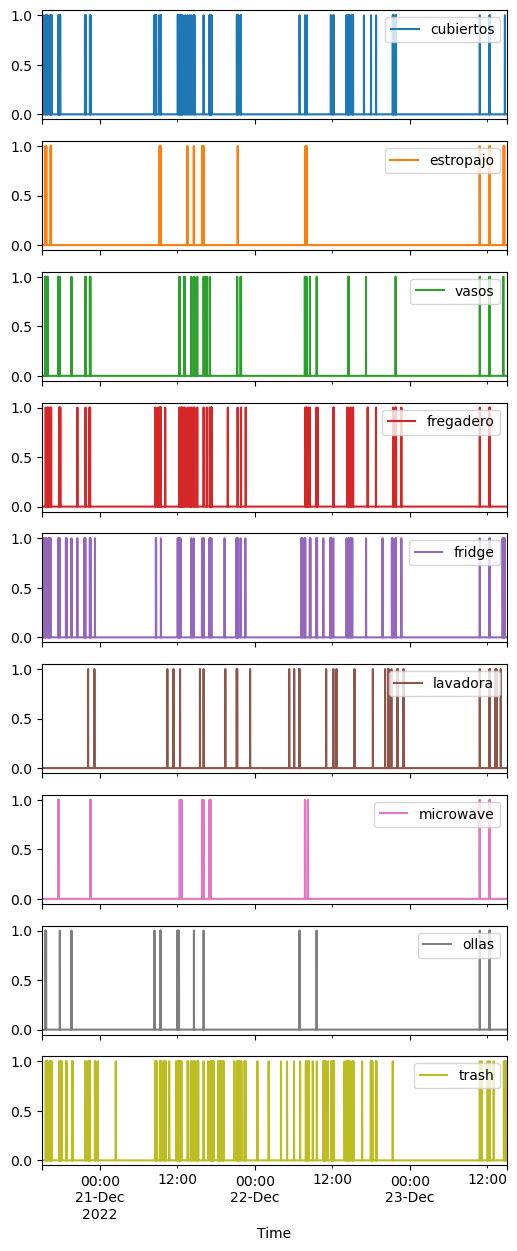

In [5]:
df.plot(x="Time",y=binary_sensors,subplots=True, legend=True, figsize=(6,15))
